# DS-SF-34 | 05 | _k_-Nearest Neighbors | Assignment | Starter Code

## _k_-Nearest Neighbors on the Boston Dataset

In [21]:
import os

import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

from sklearn import preprocessing, neighbors, model_selection

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [22]:
df = pd.read_csv(os.path.join('..', 'datasets', 'dataset-05-boston.csv'))

In [23]:
df

,CRIM,ZN,INDUS,CHAS,NOX,...,TAX,PTRATIO,BLACK,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,...,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,...,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,...,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,...,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,...,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,...,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,...,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,...,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,...,273,21.0,393.45,6.48,22.0


In [24]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
...,...,...,...,...,...,...,...,...
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000
PTRATIO,506.0,18.455534,2.164946,12.60000,17.400000,19.05000,20.200000,22.0000
BLACK,506.0,356.674032,91.294864,0.32000,375.377500,391.44000,396.225000,396.9000
LSTAT,506.0,12.653063,7.141062,1.73000,6.950000,11.36000,16.955000,37.9700


In [25]:
df.MEDV.quantile(.2)

15.3

The Boston dataset concerns itself with housing values in suburbs of Boston.  A description of the dataset is as follows:

- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sqft
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River binary/dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate (per ten thousands of dollars)
- PTRATIO: pupil-teacher ratio by town
- B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT: % lower status of the population
- MEDV: Median value of owner-occupied homes (in thousands of dollars)

> ### Question 1.  Let's first categorize `MEDV` to 4 groups: Bottom 20% as Level 1, next 30% as Level 2, next 30% categorized as Level 3, and the top 20% as Level 4.  Please create a new variable `MEDV_Category` that stores the level number

In [26]:
len(df)

506

In [27]:
# TODO

level_2 = ((df.MEDV <= df.MEDV.quantile(0.5)) & (df.MEDV > df.MEDV.quantile(0.2)))
level_3 = ((df.MEDV <= df.MEDV.quantile(0.8)) & (df.MEDV > df.MEDV.quantile(0.5)))
level_4 = (df.MEDV > df.MEDV.quantile(0.8))

df['MEDV_Category']='1'
df.loc[level_2, 'MEDV_Category'] = '2'
df.loc[level_3, 'MEDV_Category'] = '3'
df.loc[level_4, 'MEDV_Category'] = '4'

df['MEDV_Category'].value_counts()


2    154
3    149
1    102
4    101
Name: MEDV_Category, dtype: int64

## Our goal is to predict `MEDV_Category` based on `RM`, `PTRATIO`, and `LSTAT`

> ### Question 2.  First normalize `RM`, `PTRATIO`, and `LSTAT`.  By normalizing, we mean to scale each variable between 0 and 1 with the lowest value as 0 and the highest value as 1

In [28]:
# TODO
df

,CRIM,ZN,INDUS,CHAS,NOX,...,PTRATIO,BLACK,LSTAT,MEDV,MEDV_Category
0,0.00632,18.0,2.31,0,0.538,...,15.3,396.90,4.98,24.0,3
1,0.02731,0.0,7.07,0,0.469,...,17.8,396.90,9.14,21.6,3
2,0.02729,0.0,7.07,0,0.469,...,17.8,392.83,4.03,34.7,4
3,0.03237,0.0,2.18,0,0.458,...,18.7,394.63,2.94,33.4,4
4,0.06905,0.0,2.18,0,0.458,...,18.7,396.90,5.33,36.2,4
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,...,21.0,391.99,9.67,22.4,3
502,0.04527,0.0,11.93,0,0.573,...,21.0,396.90,9.08,20.6,2
503,0.06076,0.0,11.93,0,0.573,...,21.0,396.90,5.64,23.9,3
504,0.10959,0.0,11.93,0,0.573,...,21.0,393.45,6.48,22.0,3


In [29]:
X = df[['RM', 'PTRATIO', 'LSTAT']]

scaler = preprocessing.MinMaxScaler().fit(X)

X = scaler.transform(X)

In [30]:
c = df.MEDV_Category

> ### Question 3.  Run a _k_-Nearest Neighbor classifier with 5 nearest neighbors and report your misclassification error; set `weights` to `uniform`

In [33]:
# TODO
model = neighbors.KNeighborsClassifier(n_neighbors = 5, weights='uniform').\
    fit(X, c)
    
c_hat = model.predict(X)
(c_hat == c).mean()
(c_hat != c).mean()


0.2134387351778656

Answer: TODO

> ### Question 4.  Is this error reliable?

In [34]:
 This is the training error on the entire data set.  It will generally increase.
    
#     model.score(X, c)

0.7865612648221344

In [35]:
    pd.crosstab(c_hat, c, rownames = ['Hypothesized Class'], colnames = ['True Class'])

True Class,1,2,3,4
Hypothesized Class,,,,
1,87,20,2,0
2,15,113,28,6
3,0,21,112,9
4,0,0,7,86


> ### Question 5.  Now use 10-fold cross-validation to choose the most efficient `k`

In [58]:
# TODO
k_cv = 10 
k_nn = range(1, train_df.shape[0] * (k_cv - 1) / k_cv) # k-NN

gs = model_selection.GridSearchCV(
    estimator = neighbors.KNeighborsClassifier(),
    param_grid = {'n_neighbors': k_nn},
    cv = model_selection.KFold(n_splits = k_cv, shuffle = True, random_state = 0)
)

gs.fit(X,c)   


GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
       error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 7...344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [59]:
   # MODEL PRECISION
gs.best_score_


0.73122529644268774

In [60]:
   # BEST PARAMETERS
gs.best_params_


{'n_neighbors': 17}

In [61]:
   # BEST ESTIMATORS
gs.best_estimator_


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=17, p=2,
           weights='uniform')

In [62]:
   # TRAINING ACCURACY
gs.score(train_X, train_c)


0.73086419753086418

In [67]:
score_df = pd.DataFrame({'k': [cv_result['n_neighbors'] for cv_result in gs.cv_results_['params']],
    'score': gs.cv_results_['mean_test_score']})

score_df[15:25]

,k,score
15,16,0.715415
16,17,0.731225
17,18,0.715415
18,19,0.723320
19,20,0.713439
20,21,0.721344
21,22,0.721344
22,23,0.723320
23,24,0.715415
24,25,0.719368


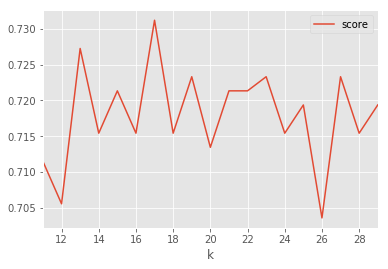

In [80]:
score_df_small=score_df.loc[(score_df.k>10)&(score_df.k<30)]
score_df_small.plot(x = 'k', y = 'score')

> ### Question 6.  Explain your findings

Answer: TODO

In [ ]:
The model accuracy is the highest when K=22 in the k-nearest neighbors algorithm.  

> ### Question 7.  Train your model with the optimal `k` you found above (don't worry if it changes from time to time - if that is the case use the one that is usually the best)

In [85]:
# TODO
X = df[columns_X]
scaler = preprocessing.MinMaxScaler().fit(X)
X = scaler.transform(X)

c = df.MEDV_Category

model = neighbors.KNeighborsClassifier(n_neighbors = 22, weights = 'uniform').\
    fit(X,c)

    

In [86]:
   # FINAL MODEL ACCURACY
model.score(X, c)

   # ACCURACY
c_hat = model.predict(X)
(c_hat == c).mean()

0.74703557312252966

Answer: TODO

> ### Question 8.  After training your model with that `k`, use it to predict the class of a neighborhood with `RM = 2`, `PRATIO = 19`, and `LSTAT = 3.5`

In [88]:
# TODO
predict_X = [ [2, 19, 3.5] ]
predict_X = scaler.transform(predict_X)

predict_y = model.predict(predict_X)

print predict_y

['2']


Answer: TODO